In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = 'SimHei'

In [3]:
df = pd.read_csv(r'D:\vscode\download\test\test01.csv')
df.drop('0',axis = 1,inplace = True) #axis参数默认为0
df.columns = ['price','shopname','comment_num']
df.head()

,price,shopname,comment_num
0,3399.0,ECCO爱步男鞋旗舰店,500+
1,2999.0,爱步（ECCO）京东自营旗舰店,1000+
2,2412.0,MORENOSPORTS海外官方旗舰店,1000+
3,2999.0,爱步（ECCO）京东自营旗舰店,1
4,1799.0,ECCO爱步男鞋旗舰店,2000+


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5999 entries, 0 to 5998
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        5999 non-null   float64
 1   shopname     5999 non-null   object 
 2   comment_num  5999 non-null   object 
dtypes: float64(1), object(2)
memory usage: 140.7+ KB


In [5]:
df.describe()

,price
count,5999.000000
mean,1955.161527
std,864.399846
min,69.000000
25%,1369.000000
50%,1859.000000
75%,2399.000000
max,9319.000000


价格分析

Text(0.5, 1.0, '某电商平台ecco价格一览图1')

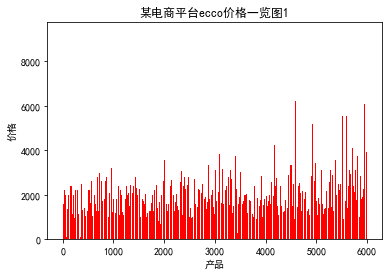

In [27]:
price = df['price'].values.tolist()
x = np.arange(0,5999).tolist()
plt.bar(x,price,color=['r'])
plt.xlabel('产品')
plt.ylabel('价格')
plt.title('某电商平台ecco价格一览图1')

Text(0.5, 1.0, '某电商平台ecco价格一览图2')

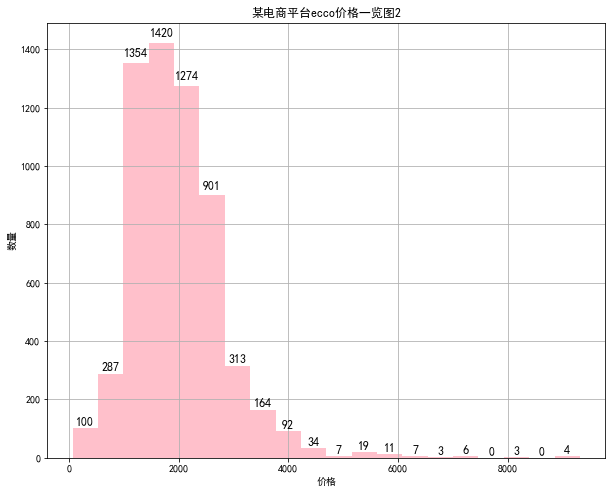

In [35]:
plt.figure(figsize=(10,8))
n, bins, patches = plt.hist(price, bins=20,color='pink')
for i in range(len(n)):
    plt.text(bins[i]+(bins[1]-bins[0])/2, n[i]*1.01, int(n[i]), ha='center', va= 'bottom',fontsize=12)
plt.grid()
plt.xlabel('价格')
plt.ylabel('数量')
plt.title('某电商平台ecco价格一览图2')


评论数分析

In [42]:
# 评价数转为int类型
df['comment_num_int'] = df['comment_num'].apply(lambda x:x.replace("万","0000").replace("+","")).astype(int)
comment_num_df = df.sort_values(by=['comment_num_int'],ascending=False)
# 评论数中去掉ecco的小物件，即价格小于200人民币
comment_price = comment_num_df[comment_num_df['price']>200]
comment_price.head()

,price,shopname,comment_num,comment_num_int
6,1999.0,ECCO爱步男鞋旗舰店,5000+,5000
24,1509.0,Danina海外专营店,5000+,5000
17,1599.0,ECCO爱步男鞋旗舰店,2000+,2000
214,1999.0,ECCO爱步男鞋旗舰店,2000+,2000
64,1999.0,ECCO爱步男鞋旗舰店,2000+,2000


In [52]:
# 分箱
comment_price_cut = pd.cut(comment_price['price'],bins=[200,1369,1859,2399,9319],labels=['不贵','中','贵','很贵'])
comment_price['price_cut'] = comment_price_cut
print(comment_price.head())
# 按分箱累加评论数
a = comment_price.groupby(by='price_cut').sum()['comment_num_int']
a.head()

      price     shopname comment_num  comment_num_int price_cut
6    1999.0  ECCO爱步男鞋旗舰店       5000+             5000         贵
24   1509.0  Danina海外专营店       5000+             5000         中
17   1599.0  ECCO爱步男鞋旗舰店       2000+             2000         中
214  1999.0  ECCO爱步男鞋旗舰店       2000+             2000         贵
64   1999.0  ECCO爱步男鞋旗舰店       2000+             2000         贵


<ipython-input-52-db30b211ff0a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comment_price['price_cut'] = comment_price_cut


price_cut
不贵     59967
中      96836
贵     149355
很贵     50347
Name: comment_num_int, dtype: int32

售货渠道

In [62]:
# 划分收获渠道为：shopname_list = ['京东自营','爱步男鞋旗舰店','爱步女鞋旗舰店','海外']
def judge_type(x):
    if '京东自营' in x:
        a='京东自营'
    elif '爱步男鞋旗舰店' in x:
        a='爱步男鞋旗舰店'
    elif '爱步女鞋旗舰店' in x:
        a='爱步女鞋旗舰店'
    elif '海外' in x:
        a='海外'
    else:
        a='无'
    return a
comment_price['shopname_cut']=df['shopname'].apply(lambda x :judge_type(x))
# print(comment_price.head())
a = comment_price.groupby(by='shopname_cut').sum()['comment_num_int']
a.head()

<ipython-input-62-4fd71077ebf8>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comment_price['shopname_cut']=df['shopname'].apply(lambda x :judge_type(x))


shopname_cut
京东自营        45712
无               0
海外          87889
爱步女鞋旗舰店     68400
爱步男鞋旗舰店    154504
Name: comment_num_int, dtype: int32

男女鞋子价格区别----以国内旗舰店数据

In [74]:
# 根据shopname_cut划分四个小dataframe,分别统计评论数和价格区间数
a = comment_price.groupby(by='shopname_cut')
man_df = a.get_group("爱步男鞋旗舰店")
woman_df=a.get_group("爱步女鞋旗舰店")
sea_df=a.get_group("海外")
self_df=a.get_group("京东自营")
def get_more_detail(table):
    x = table['price_cut'].value_counts()
    return x

list = [man_df,woman_df,sea_df,self_df]
for i in range(len(list)):
    print(get_more_detail(list[i]))

贵     302
很贵    156
中      83
不贵     22
Name: price_cut, dtype: int64
贵     207
中     102
很贵     78
不贵     38
Name: price_cut, dtype: int64
不贵    1392
中     1210
很贵    1038
贵      930
Name: price_cut, dtype: int64
贵     203
中      70
很贵     65
不贵      2
Name: price_cut, dtype: int64
